# Watts Strogatz Network Model

Here, we implement a model with:
1. Nodes representing individuals
2. Edges representing interaction

We have set parameters:
- n = 2000 (number of nodes) 
- k = 10 (number of nearest neighbors)
- p = 0.2 (probability of rewiring an edge)
- time_steps = 100 <br>

The model is implemented in main.py, with metrics_util calculating the betweenness centrality, clustering coefficient, etc.

## Model
The model simulates a SIR model for infections with a chance of permanent immunity and a chance of becoming susceptible again. <br>
### SIR Parameters
Due to the nature of the Watts Strogatz model (and a high value of k), the infection spreads quickly relative to the probability of infection. <br>
To mitigate a rapid spread of infection (due to a single node having a high number of neighbors), the infection rate is significantly reduced. <br>
**rate of infection** = 0.005 <br>
**recover rate** = 0.01 <br>
**perm_immune_rate** = 0.15

## Simulation
Due to the large number of iterations, the number of nodes in the model may be too large to efficiently visualize. <br>
Hence, we will just focus on the graph for the count of susceptible, infected, recovered, and perm_immune nodes over 100 time steps.

## Graphs
<img alt="watts_strogratz_graph" height="800" src="watts_strogatz_model_metrics.png" width="800"/>

![SIR metrics](watts_strogatz_model_output.png)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from common_utils import change_degree_type

In [2]:
df_md = pd.read_csv('output.md', sep='|', header=0, engine='python')
df_md.drop(axis = 0, index = 0, inplace=True)
df_md.drop(axis = 1, columns =[col for col in df_md.columns if col.startswith('Unnamed')], inplace=True)
df_md.columns = df_md.columns.str.strip()
df_md["Degree"] = df_md["Degree"].apply(change_degree_type)
df_md = df_md.apply(pd.to_numeric, errors='ignore')
df_md


,Name,Betweenness Centrality,Clustering Coefficient,Degree,Eigenvector Centrality,Load Centrality
1,Albert Einstein,0.003101,0.166667,12,0.025992,0.003073
2,Isaac Newton,0.001490,0.266667,10,0.021629,0.001457
3,Leonardo da Vinci,0.001215,0.277778,9,0.018475,0.001231
4,William Shakespeare,0.001667,0.266667,10,0.021399,0.001650
5,Charles Darwin,0.001630,0.244444,10,0.020539,0.001603
...,...,...,...,...,...,...
96,Yuri Gagarin,0.001069,0.388889,9,0.015548,0.001058
97,Buzz Aldrin,0.001955,0.309091,11,0.019520,0.001961
98,Sally Ride,0.001488,0.277778,9,0.016364,0.001449
99,Mae Jemison,0.001784,0.277778,9,0.016505,0.001807


In [3]:
df_csv = pd.read_csv('output.csv')
df_csv["Degree"] = df_csv["Degree"].apply(change_degree_type)
df_csv.drop(columns = "Unnamed: 0", inplace=True)
df_csv.columns = df_csv.columns.str.strip()

In [4]:
df_csv

,Betweenness Centrality,Clustering Coefficient,Degree,Eigenvector Centrality,Load Centrality
0,0.003101,0.166667,12,0.025992,0.003073
1,0.001490,0.266667,10,0.021629,0.001457
2,0.001215,0.277778,9,0.018475,0.001231
3,0.001667,0.266667,10,0.021399,0.001650
4,0.001630,0.244444,10,0.020539,0.001603
...,...,...,...,...,...
1995,0.002584,0.303030,12,0.026806,0.002597
1996,0.000987,0.466667,10,0.023108,0.000965
1997,0.001047,0.357143,8,0.020264,0.001038
1998,0.002480,0.303030,12,0.028385,0.002503


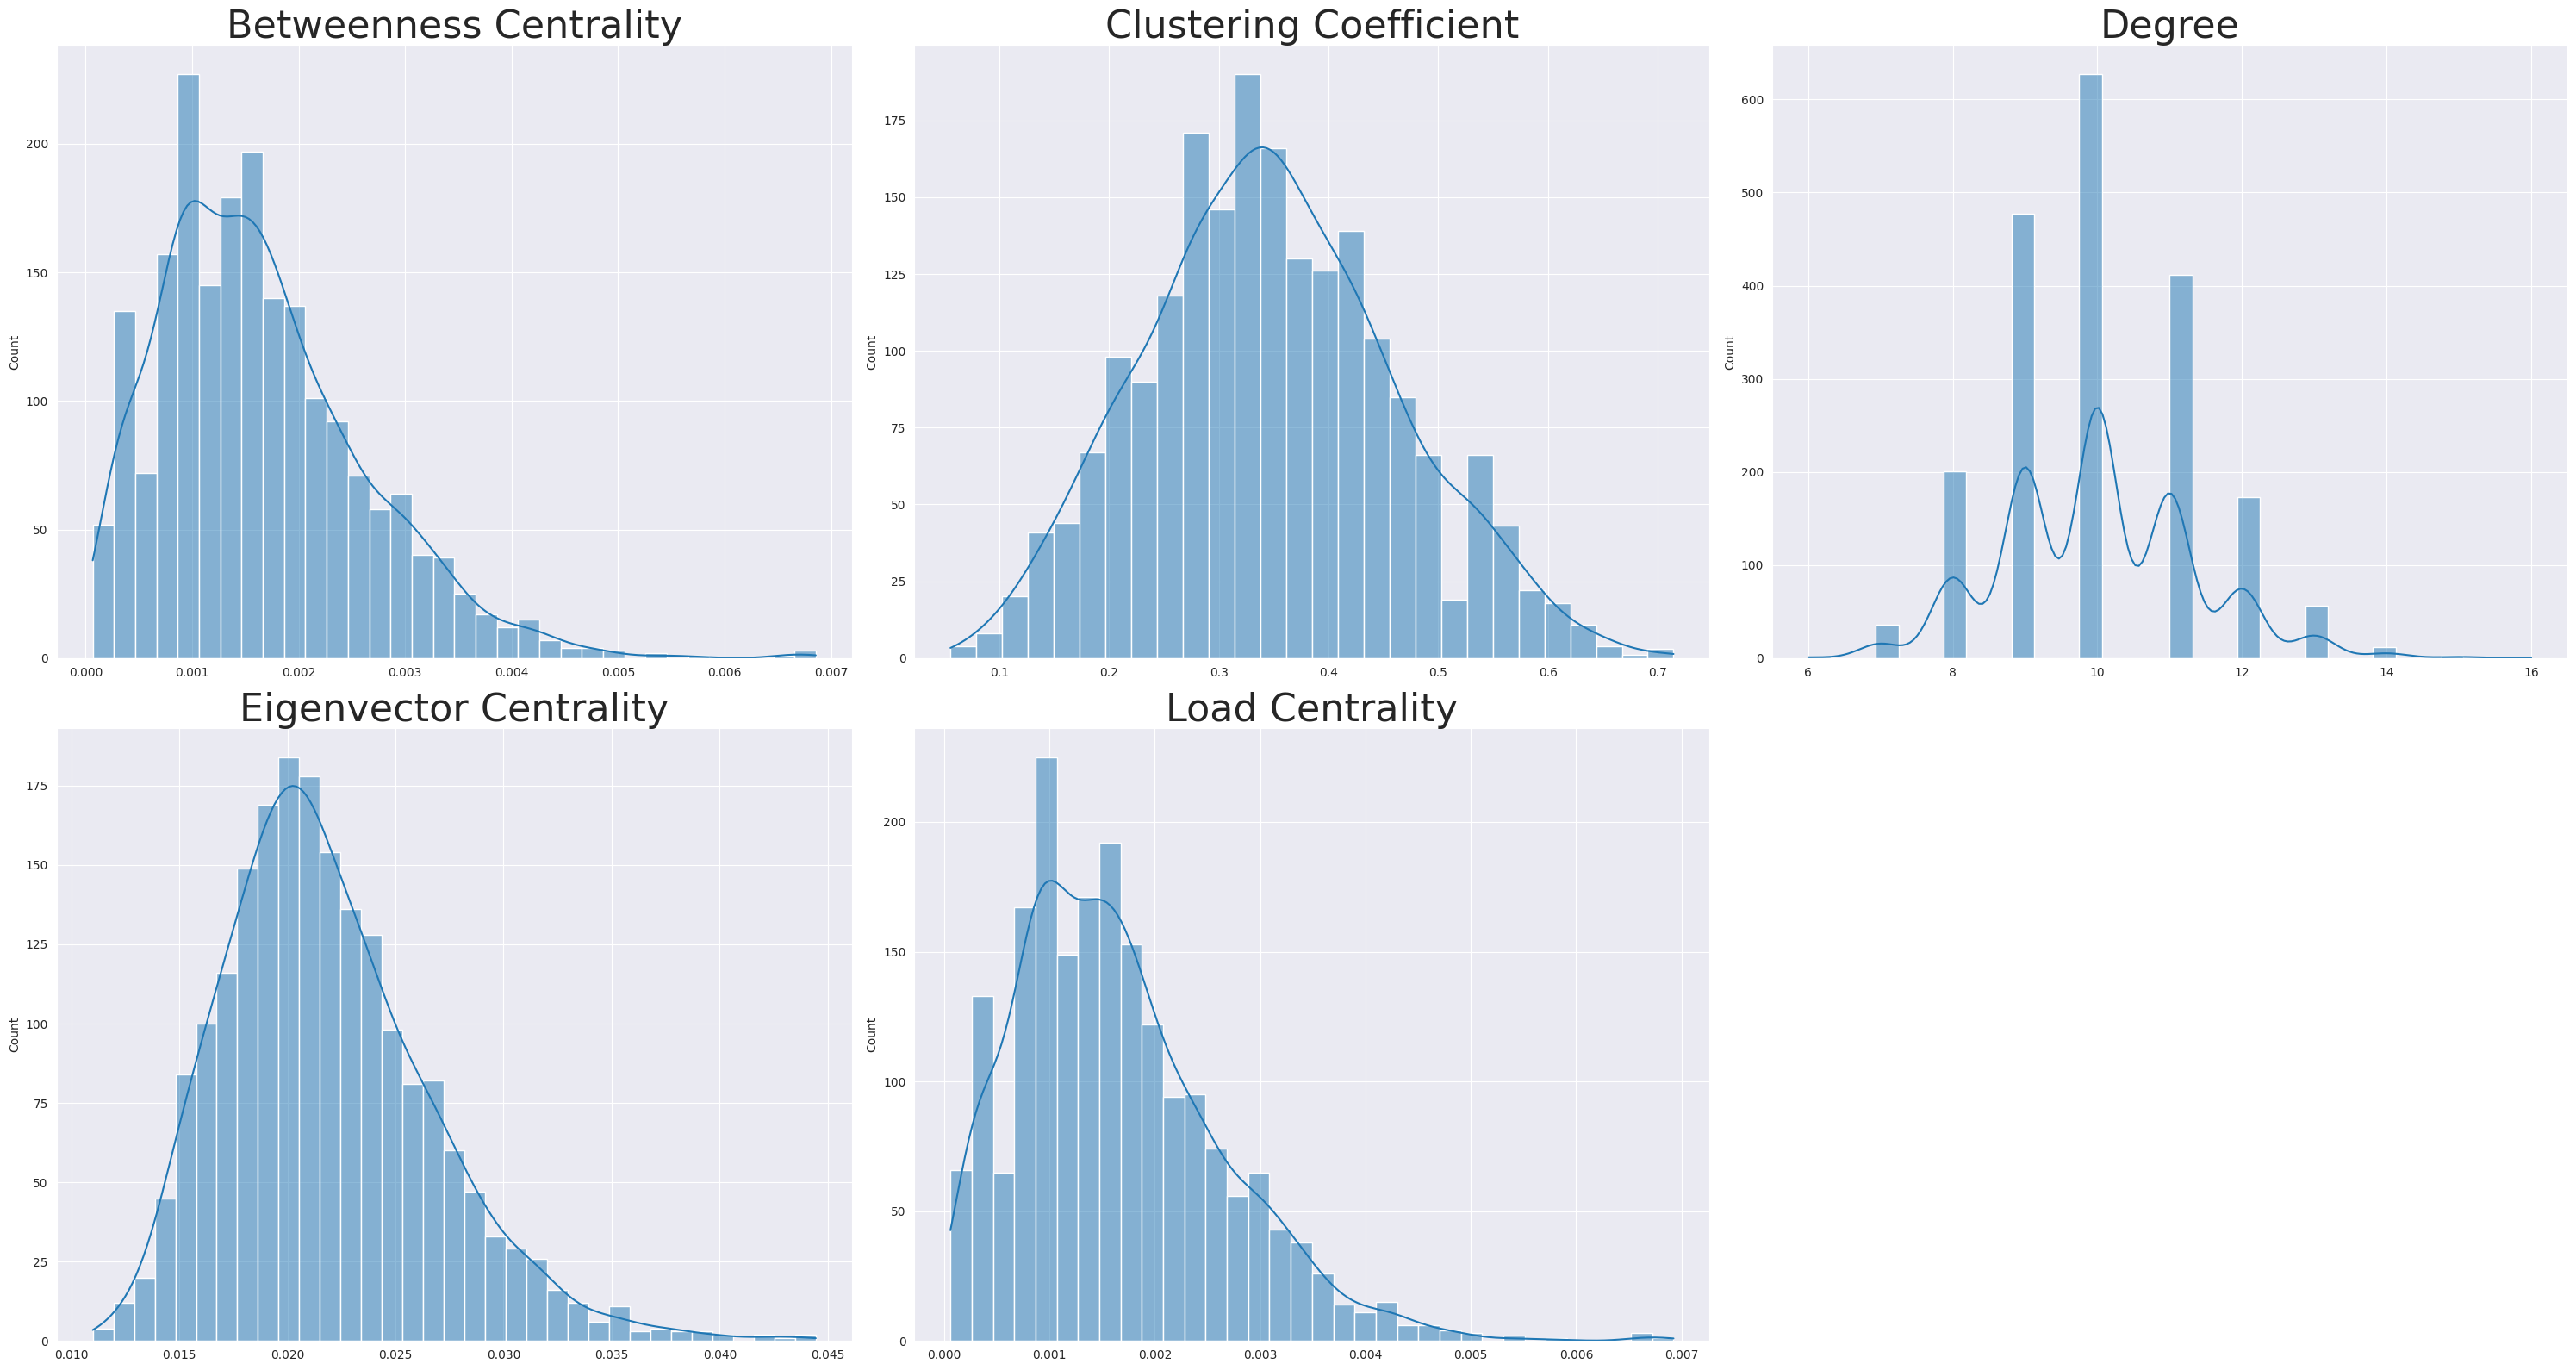

In [11]:
# Ensure your DataFrame has the correct columns
columns_to_plot = df_csv.columns

fig, axs = plt.subplots(2, 3, figsize=(30, 16))

for i, column in enumerate(columns_to_plot):
    sns.histplot(df_csv[column], kde=True, ax=axs[i//3, i%3])
    axs[i//3, i%3].set_title(column, fontsize=32)
    axs[i//3, i%3].set_xlabel("")
#remove plots that dont have graphs
plt.delaxes(axs[1, 2])
# Show the plots
plt.tight_layout()
plt.show()

In [92]:
df_csv.describe()

,Betweenness Centrality,Clustering Coefficient,Degree,Eigenvector Centrality,Load Centrality
count,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000
mean,0.001634,0.339355,10.00000,0.021948,0.001634
std,0.000979,0.112103,1.34867,0.004277,0.000995
min,0.000071,0.045455,6.00000,0.009852,0.000058
25%,0.000940,0.264394,9.00000,0.018867,0.000928
50%,0.001488,0.333333,10.00000,0.021584,0.001491
75%,0.002135,0.416667,11.00000,0.024663,0.002143
max,0.006901,0.761905,16.00000,0.040806,0.007000


We can see that betweennes centrality, clustering coefficient, eigenvector centrality, and load centrality are very low in value.


# Recommendations

- Set interaction rate between nodes. However, this increases the space complexity significantly, causing performance issues.
- Adapt the SIR model implemented on the lattice environment from activity. However, this introduces more complexity.
- Analyze the model between different parameters and observe how they impact the outcomes. For example, changing the number of nearest neighbors, and probability of rewiring the edges.
- Change the initial infected to the nodes with the highest centrality.
- Analyze the effect of centrality in the initial infection spread, and compare it to a random initial spread.